In [2]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
# from google.colab import files 
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
from keras.layers import Dense,Dropout,Input,MaxPooling2D,MaxPool2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
import os

# **Get The Kaggle Dataset**

[Dataset Link](https://www.kaggle.com/datasets/volkandl/car-brand-logos)

Get the Kaggle API KEY as mentioned in the [steps](https://www.kaggle.com/docs/api#authentication)

In [ ]:
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json

# api_token = {"username":"<key>","key":"<value>"}

# import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json

# **Download The Dataset**

In [ ]:
!kaggle datasets download -d volkandl/car-brand-logos


 99% 215M/217M [00:11<00:00, 20.4MB/s]
100% 217M/217M [00:11<00:00, 20.3MB/s]


**Unzip The dataset**

In [ ]:
!unzip 'car-brand-logos.zip' -d car-brand-logos

# **Preprocess and analysis**

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator()

clTrain = os.listdir(r"C:\Users\parvs\Downloads\train_and_test\train")
clTest = os.listdir(r"C:\Users\parvs\Downloads\train_and_test\test")

# Train generator for train folder
train_generator = datagen.flow_from_directory(
    r"C:\Users\parvs\Downloads\train_and_test\train",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    classes = clTrain
    )

# Test generator for test folder
test_generator = datagen.flow_from_directory(
    r"C:\Users\parvs\Downloads\train_and_test\test",
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode="categorical",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    classes = clTest
    )

print(len(clTest))

Found 116868 images belonging to 2338 classes.
Found 50161 images belonging to 2338 classes.
2338


# **Create the  VGG19 model**

**We are creating a CNN model using keras with input shape as (331,331,3) which stands for 331x331 RGB pictures . Refer [link](https://keras.io/api/layers/convolution_layers/convolution2d/)**

**A dropout layer has been added to prevent overfitting [link](https://keras.io/api/layers/regularization_layers/dropout/)**

In [ ]:
# vgg = VGG19(include_top= False, weights = "imagenet", input_shape=( IMAGE_SIZE,IMAGE_SIZE, 3))
# vgg_layer_list = vgg.layers

# model = Sequential ()

# for layer in vgg_layer_list:
#     model.add(layer)
    
# for layer in model.layers:
#     layer.trainable = False
    
    
# model.add(Flatten())
# model.add(Dense(1024))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

# model.add(Dense(8))
# model.add(Activation('softmax'))
# model.summary()

# opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)

# model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

# model.summary()

In [4]:
# from tensorflow.keras.applications import ResNet50

# # Define image size
# IMAGE_SIZE = 256

# # Load pre-trained ResNet50 model without the top layer
# resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# # Freeze base layers (optional, adjust based on training needs)
# for layer in resnet.layers:
#     layer.trainable = False

# # Build the model
# model = Sequential()

# # Add pre-trained ResNet50 layers
# model.add(resnet)

# # Add custom layers for classification
# model.add(Flatten())
# model.add(Dense(1024, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(8, activation="softmax"))

# # Print model summary
# model.summary()

# # Choose optimizer and compile the model
# opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Define image size
IMAGE_SIZE = 256

# Load pre-trained ResNet50 model without the top layer
resnet = ResNet50(include_top=False, weights="imagenet", input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Freeze base layers (optional, adjust based on training needs)
for layer in resnet.layers:
    layer.trainable = False

# Build the model
model = Sequential()

# Add pre-trained ResNet50 layers
model.add(resnet)

# Add custom layers for classification
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="softmax"))

# Print model summary
model.summary()

# Choose optimizer and compile the model
opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 1024)              134218752 
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 8)                

c:\Users\parvs\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# **Training the Keras Model**

In [ ]:
epochs = 10

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history2 = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=test_generator, 
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint])

In [ ]:
epochs = 10

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history3 = model.fit(test_generator, 
                    steps_per_epoch=len(test_generator), 
                    epochs=epochs, 
                    validation_data=train_generator, 
                    validation_steps=len(train_generator),
                    callbacks=[checkpoint])

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 4.6085 - accuracy: 0.7625

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


7/7 [==============================] - 43s 7s/step - loss: 4.6085 - accuracy: 0.7625 - val_loss: 0.0359 - val_accuracy: 0.9960
Epoch 2/10
7/7 [==============================] - 40s 6s/step - loss: 1.6636 - accuracy: 0.8850 - val_loss: 0.0985 - val_accuracy: 0.9920
Epoch 3/10
7/7 [==============================] - 40s 7s/step - loss: 0.8264 - accuracy: 0.9350 - val_loss: 0.3969 - val_accuracy: 0.9745
Epoch 4/10
7/7 [==============================] - 45s 7s/step - loss: 0.5193 - accuracy: 0.9525 - val_loss: 0.4260 - val_accuracy: 0.9610
Epoch 5/10
7/7 [==============================] - 43s 7s/step - loss: 0.4588 - accuracy: 0.9575 - val_loss: 0.3609 - val_accuracy: 0.9749
Epoch 6/10
7/7 [==============================] - 42s 7s/step - loss: 0.2356 - accuracy: 0.9800 - val_loss: 0.4219 - val_accuracy: 0.9674
Epoch 7/10
7/7 [==============================] - 41s 7s/step - loss: 0.1404 - accuracy: 0.9900 - val_loss: 0.4077 - val_accuracy: 0.9650
Epoch 8/10
7/7 [=============================

In [ ]:
epochs = 10

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history4 = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=test_generator, 
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint])

Epoch 1/10
17/40 [===========>..................] - ETA: 19s - loss: 0.4167 - accuracy: 0.9623

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


40/40 [==============================] - 44s 1s/step - loss: 0.3655 - accuracy: 0.9666 - val_loss: 0.2640 - val_accuracy: 0.9875
Epoch 2/10
40/40 [==============================] - 45s 1s/step - loss: 0.0950 - accuracy: 0.9877 - val_loss: 0.2146 - val_accuracy: 0.9900
Epoch 3/10
40/40 [==============================] - 45s 1s/step - loss: 0.1030 - accuracy: 0.9873 - val_loss: 0.1849 - val_accuracy: 0.9850
Epoch 4/10
 9/40 [=====>........................] - ETA: 26s - loss: 0.0305 - accuracy: 0.9931

# Yep


In [5]:
# Define callbacks
epochs = 10

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

learning_rate_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

# Train the model with callbacks
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    callbacks=[checkpoint, early_stopping, learning_rate_scheduler])


Epoch 1/10


: 

# **Loss and Accuracy Curves**

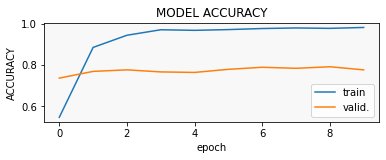

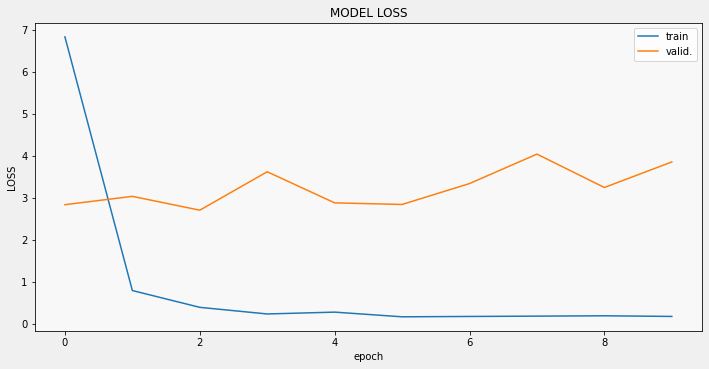

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)  


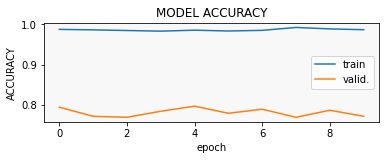

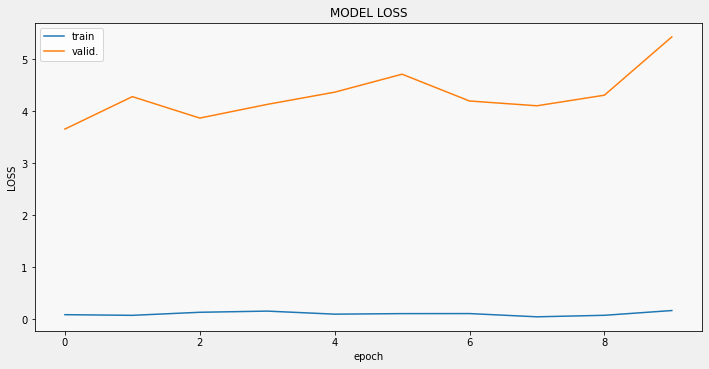

In [ ]:
display_training_curves(
    history2.history['accuracy'],
    history2.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history2.history['loss'],
    history2.history['val_loss'],
    'LOSS',
    211,
)  


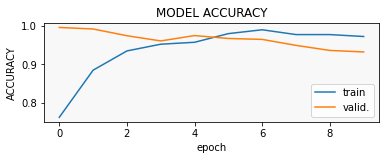

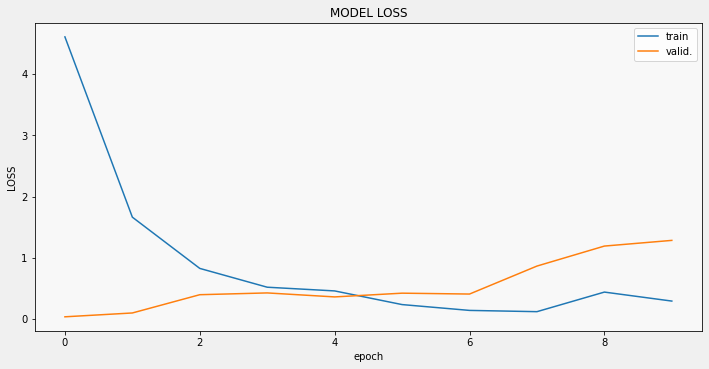

In [ ]:
display_training_curves(
    history3.history['accuracy'],
    history3.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history3.history['loss'],
    history3.history['val_loss'],
    'LOSS',
    211,
)  


In [ ]:
display_training_curves(
    history4.history['accuracy'],
    history4.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history4.history['loss'],
    history4.history['val_loss'],
    'LOSS',
    211,
)  


# **Accuracy**

In [ ]:
score = model.evaluate(test_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

7/7 [==============================] - 7s 821ms/step - loss: 0.2080 - accuracy: 0.9825
Accuracy: 98.25%
Loss:  0.20797717571258545


In [ ]:
score = model.evaluate(train_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

40/40 [==============================] - 36s 900ms/step - loss: 0.0085 - accuracy: 0.9984
Accuracy: 99.84%
Loss:  0.008498013950884342


# **Save The Model**

Refer the [docs](https://www.tensorflow.org/guide/keras/save_and_serialize) from the Tensorflow

In [ ]:
!rm -R '/content/model'
!mkdir '/content/model'
model.save('/content/model')

In [ ]:
!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 91%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model/variables/variables.index (deflated 69%)
  adding: content/model/keras_metadata.pb (deflated 95%)
  adding: content/model/assets/ (stored 0%)


# **Reconstruct the model and check the predicted accuracy**

In [ ]:
reconstructed_model = tf.keras.models.load_model('/content/model/')
score = reconstructed_model.evaluate(test_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

score = reconstructed_model.evaluate(train_generator,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

7/7 [==============================] - 30s 1s/step - loss: 0.2080 - accuracy: 0.9825
Accuracy: 98.25%
Loss:  0.2079770714044571
17/40 [===========>..................] - ETA: 20s - loss: 0.0184 - accuracy: 0.9972

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


40/40 [==============================] - 39s 966ms/step - loss: 0.0085 - accuracy: 0.9984
Accuracy: 99.84%
Loss:  0.008498027920722961


# **Test With Random Images**

In [ ]:
class_names=train_generator.class_indices

labels={}
for key, value in class_names.items():
    labels[value]=key

In [ ]:
labels

{0: 'hyundai',
 1: 'lexus',
 2: 'mazda',
 3: 'mercedes',
 4: 'opel',
 5: 'skoda',
 6: 'toyota',
 7: 'volkswagen'}

# **Predict for sample images**

Make sure the image focuses the logo 

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

def GetResultForImage(image_location):
  img = cv2.imread(image_location, cv2.IMREAD_UNCHANGED)
  
  print('Original Dimensions : ',img.shape)
  resized = cv2.resize(img,(IMAGE_SIZE,IMAGE_SIZE),3)
  result = np.expand_dims(resized, axis=0)
  result=reconstructed_model.predict(result)
  print(labels[np.argmax(result)])
  cv2_imshow(resized)

In [ ]:
import urllib.request
#hyundai
urllib.request.urlretrieve("https://images.unsplash.com/photo-1588036873025-7261a5647adf?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2220&q=80", "hyundai-1.jpg")
urllib.request.urlretrieve("https://images.unsplash.com/photo-1471977360223-d8cc63cec57c?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2340&q=80", "hyundai-2.jpg")

#lexus
urllib.request.urlretrieve("data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAAAeFBMVEX///8AAAD29vaysrJ6enpHR0fGxsZ0dHQpKSn5+fmmpqZjY2NtbW3W1tbo6OhLS0uMjIw3Nzfw8PBfX1+dnZ28vLzi4uKSkpLPz8+srKy2trZQUFAiIiLk5OTc3NwTExOEhISPj48ZGRk+Pj4xMTFYWFgLCwsdHR0qW3nfAAAJyUlEQVR4nO2d22LiIBCG10NTE020qfFUtbGt9v3fcGs0BJjhnBqxfFe7FhV+YRhmgPz7FwgEAoFAIBAIBAKBQCAQCAQCN6Cf7dNVdCZNs7zr2twpi2I+fP3qAbZvw3mxj7uu3t2QJs8jqBLLabyM/nw/WyRHlU4Nn4uuq9sh6eykr1RFv+sqd0Q+f0dG23G4HESrfZbna0ys6OeNvemm67rfmHTM6/BUbvZMkRdErJ+XqzeWf8h+RZ+sBi/LFSizwDvW5vrPyR+xXykr1dMA7SaIVsufl4fkf5M/0Lv6E0aAuaDJU6jVsfpDXpIXZjesdicwdvulEBU7QK3e67/ljb2LblPpbug/0VKJmxohgzBr/pwSJ3Zyg0p3xIpuvLBX/WiKaMUqm5DXH9XQL6m2H2QFEa+Bt085mSUGv1jj7qBcq9FOVrCEWk1hKSJ9+TvV7RTKXJXSgpjBwsqRQf14hotyriTW6occ0Qo3TPnH9c9vv1HhDvlUtZyAGCyhWarLvrZd3U55JQ0/KRzvGdTqWVx6qi7iHY0CJ0WUZQW1+pKVr/vWvM3qdkrRtFyhFeZhSbtiXAd64FLcTyiTnSmKPkGtFEuarC73IHH6RgHVz7+EWkm91zN1t32MKbFZmqgMyx5q9aT+/DqM8QiufGOGEDecBTFYOoOrLttCZbvmmTRclW54hVqlOt8wuBYunevaNcQA99aKkkiKQtMh2F6Lq6aPu4cERkeKghnUStdm1zbed9e0cRtUUU0kK639LboD/c451O14URQcQq20DFbF/PqOpVtlu0a3YyFxGYOWkyHsVtmOIRqc5OViqJWqKzLU+2+8XvSQwaWY15DMl1FasHb9hy6V7RrSdPmsPodamfnjJFjhUtmOITl4aZgFS9UfDb+pfp/HyR7iZ8qN9QcUyzSGUDseKs/3jiEmS2p4Ea9BHqZHqH1fj40WibzLvEXEazCPqR+u7/y0r2zXkNZLyiBeg0Ugb63xTfcN0UG2yEM2lVps7SORa28DpsSxlqxwkViDMu6FQHwHbyMPJPJZCotgKVWbXWpErL267H2S1i0Q++9vUCurrBYRS3/1fWcQsYR79Aqo1bfVV/kv1k45DJGN8HZrYSKWdH/OPUMM0lhQIIFaiYoqIF3U3225dQtECS2olW2wkyzFrevaOT15EzZQK9s9C/Vyx87i3QVkrsP7C0zWK2KEYhxH8T1ANjyiQWXExzJeQF8hQR6Pd9MQs4uGaKDf8I4V04FskvA4rkzWO6iFh9tArHeHkk+wr2v3ED8KM1owjmVrcUgfNQ2w3hXEaGGBhAkQy7Zj1Pl7nwOllGONjUNELLtx2Pi23gZoKkgzkNDJAYrV630+GdPk0Tx2HM7IzkEgq2hHPJ4LzzRb2RAT37ZWRknse4TsZSvh35AtpE54f/ywcdMRq6W8/MII7zsW5U0hofV4K2u8Kd5GlBuaVBfmBBlcGKLC931/FQPSHCzzUrTWuW7esF+B+EFb9M8rJH1vgbfxZJbGfRCl5bNovSyHDpSJ3747RXPUy+N9Gzej2axWdl0VDxj+St+K51eSFj/0Dhgr7ZY55Iy0vxscBDTxmK+WUnvNTmh/c4UiKAfBNi2Bf97oYSZCCmpL8ti5fc12wcc6eU+gD4u7meSsWSV5nPuS06dud/i2H4tZc4TR300zGtCnAz7szunS1wU+xNpZTM7sXpuZLuj6CRUC2z5yt7oQMWGGr7m+j5SvmSM+Xqe9tNmwN5S+l4XaUcqjkg2rPpjTLqHg7t7snSbzSDQkF8WczzB+/I1eVbNHg1hP43KZrIsL62Q5HPOqnhl7n5gwp0Ay0mqm60d02HWIym8jpSYbz4+MO5IXJTbUAB+T9QNkb9pgV8yfp6L7zr9eZ4P0r449Mfl+VWySZHkhSTZRugsqBQKBQCAQCAQCgcANiI6vhKP9PXDZqhgMEgt0PjyZYSjDpdGAAt0j30+ZMkLqy5MG9ArfLre0mmlFWXBOyshLLvh0ZS6aiS7CpkVD5HFlOPXvwpy9tRBr57zLUZFURg4HX1AePnmmS/N7nZALzsTU/d9NrAy5ttaYqSQOE4u/wEUs9CF3Yurf00ks4zMSnyn6sjAFwZzvGe2ZU9X2YokGtpAWxIrNTdXXvxi5UUW0fTJjxBlwD7iwFgv/wWS4i4Vc8KvkfPkfcvUFvsXtQBeormhpRSyL02jOYiG3t6upbkrcoQcF+MOuzI1tx4uWbYgFHpPxOlExrutmKxbQamhwkyM6gzLHWPuMYa9tWgticePh3Wjrk6VY4FIGs0QV9tgm2uViJvamVi2IxfpWhifQLcXi/TnTTbC4nb/ahpQepyfK93YXi30QmeklcHZi8Q+gtdhcjdr5s8sVM40s6fc4i8UNQtNEm5VY/IRitbMTt/MrpkJbySOAbcRif2TjfUtWYvEtNP3SK8qVEr+wdxXLsWNZiQXWVYXW2h1OPKidJ7yALVuuYrErDo3n1HDYiCVtoqTx8JP6qJ2/gIxtV7HYaWk0VlNu6KnLQix5fxCD/pKonT8XxuZXR7F2PRuOzUZfC7GQ54BqgXf7HbpHCw9DOooljPYoIO6yhVi2oT6RjUDtPOpZO4qFPDxRj21sLVZ+ITYdjkKDGmEhS6wujmLx3qE+39Zi/UPeqYNYLNTjGkFP11Es5ImAukzcxDKKy1YIHs7QF17uAG7dchRLMvUqSYFYBvdXwVnsrchjOZof1MD/eI5ixUURrQDRKt0DCv5BulV6hMnu6F/UDx+eancf0+ILfBDNlnUgmBYoIwbShIWSZ7Ym1SqFtdK6W6fBw1M/7DZds14IZueZWZER60P14W5i8YGVc2dgn+OifKrnFWBmrLRif6hRis7t9FBkv1b1nY5iHZBfjX1JL4YHnAaLJynwhr0KAWC5hG0zK07gOyQ4isWlrqomcv64llq8obG5jZU17OO6m2C+EPkpuPorupajWNwzuarQNh8g1tjvAKy7+R6JPaP3N3XOEnPf6lmai6ON5PFZN7H4elz6NzAUz5tVKmMPssSzyBC2O7PxhZyftXvEQQXPnTnIsiTMMspQrD6fP67vyJbP3r/OGPQPLNF9GYpIMv9lKuCNWRe8j0yAi3vyg7Z7954Z75h/htn5alZEnsF2IxqPGnm+4I0QRe+Rw4jVrGi+yGoH2t3rqA5vYguNJdnPQ9E6zOIE+3yXfjuXyZkhvdkB2+pyHoq2cVoXgEcXr288GD9ViVnEzldDcXPjik7Rs+5xNJ847Hg0QyPXuEceE1n1xn4xO2rvcXTjbSm/qSPu34AWTl32swVwAfeLXaYgV9UsHAgNBAKBQCAQCAQCgUAgEAgE/hj/AdyQhnaNg4ZaAAAAAElFTkSuQmCC", "lexus-1.jpg")
urllib.request.urlretrieve("https://thumbs.dreamstime.com/z/new-hope-minnesota-october-close-up-lexus-logo-emblem-car-257994350.jpg", "lexus-2.jpg")

#mazda
urllib.request.urlretrieve("https://www.shutterstock.com/image-photo/bangkokthailand-may-222014-logo-brand-260nw-204080434.jpg","mazda-1.jpg")
urllib.request.urlretrieve("https://www.schoolphotoproject.com/_picture-of-cars-motorbikes/car-mazda-logo-photo-l.jpg","mazda-2.jpg")


#mercedes
urllib.request.urlretrieve("https://images.newindianexpress.com/uploads/user/imagelibrary/2021/12/2/w900X450/Mercedes_Benz_AP.jpg?w=400&dpr=2.6","mercedes-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ854tdVSiZLeBxVSjW-zdtGnHAA67yu2N06w&usqp=CAU","mercedes-2.jpg")

#opel
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQESUxbt7oUoBmKslA5YNh3b0NcXUojMM3Aeg&usqp=CAU","opel-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRgyyB9T1otFMlgiMojMr3GE03fFoEsU6reQA&usqp=CAU","opel-2.jpg")


#skoda
urllib.request.urlretrieve("https://thumbs.dreamstime.com/b/bordeaux-aquitaine-france-skoda-logo-brand-car-dealership-text-sign-vehicle-store-showroom-shop-czech-bordeaux-aquitaine-france-219259318.jpg","skoda-1.jpg")
urllib.request.urlretrieve("https://media.gettyimages.com/id/1230550013/photo/a-skoda-logo-seen-on-a-parked-car-in-dublin-city-center-on-tuesday-january-11-in-dublin.jpg?s=612x612&w=gi&k=20&c=b8xHL2cUjvyQC1jGIVLqgglYVZGB7RGWqd5QV2VD5cw=","skoda-2.jpg")


#toyota
urllib.request.urlretrieve("https://us.123rf.com/450wm/engdao/engdao1904/engdao190400491/engdao190400491.jpg?ver=6","toyota-1.jpg")
urllib.request.urlretrieve("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQLednVkQl--Dx9jOqUFk1t5EXfTkzyiiWPOw&usqp=CAU","toyota-2.jpg")

#volkswagen
urllib.request.urlretrieve("https://www.thedrive.com/content/2020/04/vw-logo-atlas.jpg?quality=85&crop=16%3A9&auto=webp&optimize=high&quality=70&width=1440","volkswagen-1.jpg")
urllib.request.urlretrieve("https://m.media-amazon.com/images/I/51SsqpaeYOL.jpg","volkswagen-2.jpg")


('volkswagen-2.jpg', <http.client.HTTPMessage at 0x7f75b3fedb50>)

Original Dimensions :  (1591, 2220, 3)
1/1 [==============================] - 0s 18ms/step
hyundai


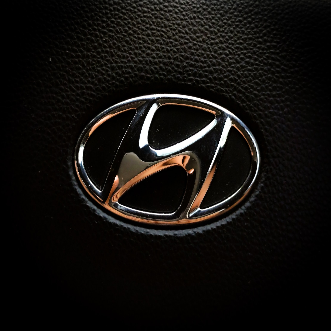

Original Dimensions :  (1560, 2340, 3)
1/1 [==============================] - 0s 16ms/step
hyundai


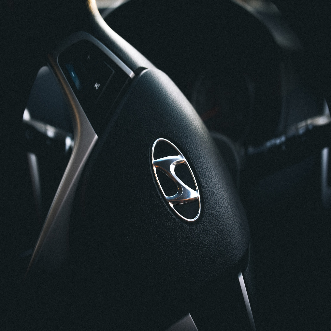

Original Dimensions :  (168, 300, 3)
1/1 [==============================] - 0s 34ms/step
lexus


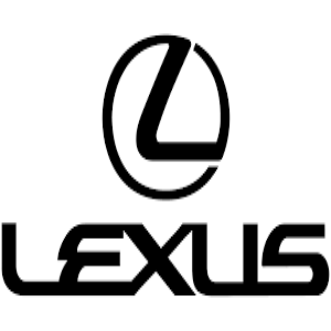

Original Dimensions :  (1156, 1600, 3)
1/1 [==============================] - 0s 16ms/step
lexus


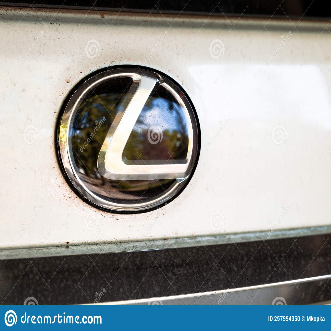

Original Dimensions :  (280, 390, 3)
1/1 [==============================] - 0s 20ms/step
mazda


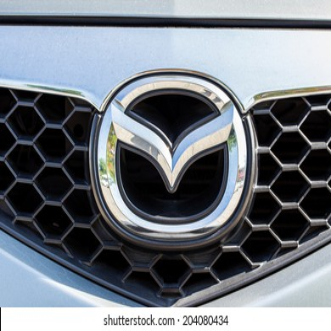

Original Dimensions :  (1704, 2272, 3)
1/1 [==============================] - 0s 17ms/step
mazda


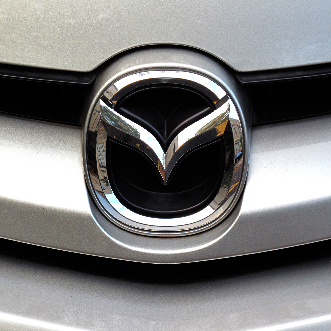

Original Dimensions :  (450, 900, 3)
1/1 [==============================] - 0s 19ms/step
mercedes


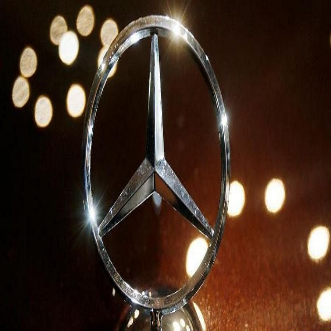

Original Dimensions :  (168, 300, 3)
1/1 [==============================] - 0s 26ms/step
mercedes


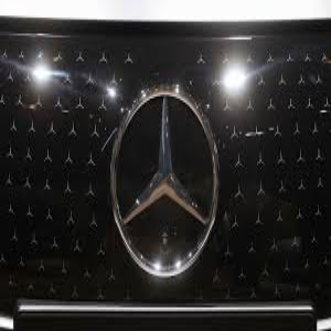

Original Dimensions :  (192, 263, 3)
1/1 [==============================] - 0s 23ms/step
opel


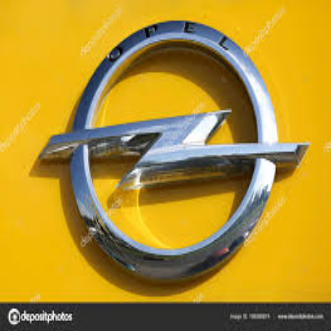

Original Dimensions :  (169, 299, 3)
1/1 [==============================] - 0s 22ms/step
opel


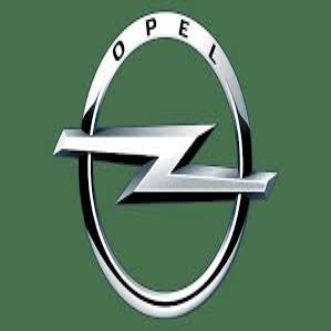

Original Dimensions :  (534, 800, 3)
1/1 [==============================] - 0s 23ms/step
skoda


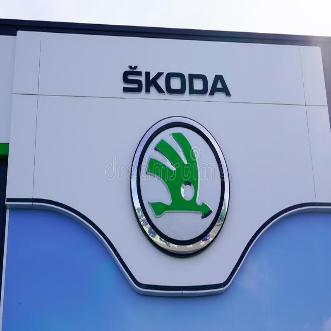

Original Dimensions :  (408, 612, 3)
1/1 [==============================] - 0s 29ms/step
skoda


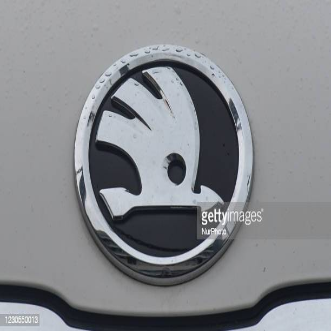

Original Dimensions :  (300, 450, 3)
1/1 [==============================] - 0s 26ms/step
toyota


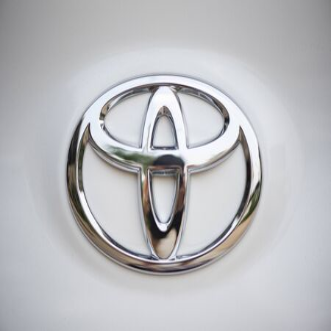

Original Dimensions :  (168, 299, 3)
1/1 [==============================] - 0s 23ms/step
toyota


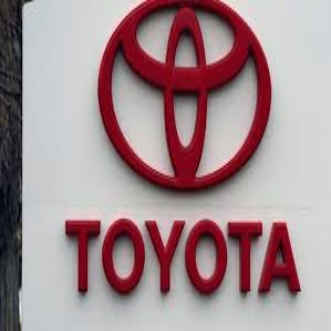

Original Dimensions :  (810, 1440, 3)
1/1 [==============================] - 0s 30ms/step
volkswagen


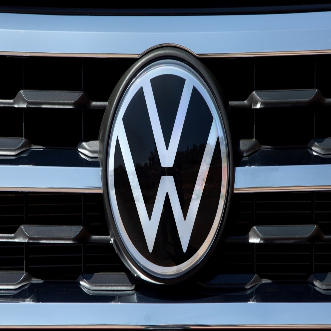

Original Dimensions :  (464, 500, 3)
1/1 [==============================] - 0s 36ms/step
volkswagen


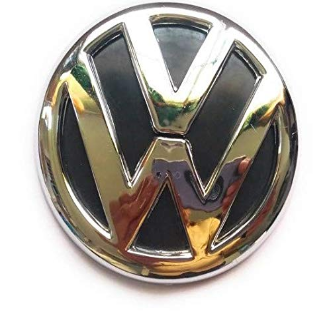

In [ ]:
GetResultForImage("hyundai-1.jpg")
GetResultForImage("hyundai-2.jpg")

GetResultForImage("lexus-1.jpg")
GetResultForImage("lexus-2.jpg")

GetResultForImage("mazda-1.jpg")
GetResultForImage("mazda-2.jpg")

GetResultForImage("mercedes-1.jpg")
GetResultForImage("mercedes-2.jpg")


GetResultForImage("opel-1.jpg")
GetResultForImage("opel-2.jpg")

GetResultForImage("skoda-1.jpg")
GetResultForImage("skoda-2.jpg")

GetResultForImage("toyota-1.jpg")
GetResultForImage("toyota-2.jpg")


GetResultForImage("volkswagen-1.jpg")
GetResultForImage("volkswagen-2.jpg")